# Task 2-Using Iris Dataset Perform Unsupervised Machine Learning

# Submitted By -Anjali Ruprela

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


In [2]:
#Load Datasets
iris =datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns =iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\Meow\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


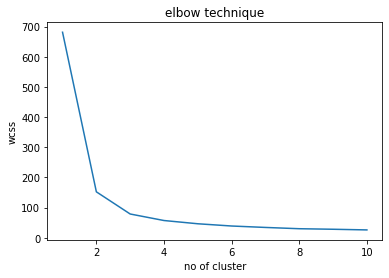

In [3]:
#finding optimum number of cluster
x= iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init ='k-means++',
                    max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
#plotting result inoto line graph
plt.plot(range(1,11),wcss)
plt.title('elbow technique')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show()

In [4]:
#from above observation we select cluster as 3
kmeans =KMeans(n_clusters=3,init='k-means++',
              max_iter=300,n_init=10,random_state=0)
y_kmeans= kmeans.fit_predict(x)

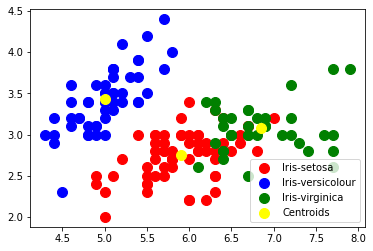

In [5]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()